<a href="https://colab.research.google.com/github/NovaDileep/mainproject/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras import utils as np_utils

In [3]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from google.colab.patches import cv2_imshow
from PIL import Image
import os
from __future__ import print_function
import keras
import pandas as pd
from pandas import DataFrame as df 
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50

from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,MaxPooling2D
from skimage import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model,load_model 

In [ ]:

#code to resize already run don't run again
source_folder = '/content/drive/MyDrive/project/new/others/'
destination_folder = '/content/drive/MyDrive/project/new_size/others/'
directory = os.listdir(source_folder)
new_image_width=150
new_image_height=150
for item in directory:
  img = Image.open(source_folder +'/'+ item)
  imgResize = img.resize((new_image_width, new_image_height), Image.ANTIALIAS)
  imgResize.save(destination_folder + item[:-4] +'.png', quality = 90)


In [ ]:
img=cv2.imread('/content/drive/MyDrive/project/new_size/others/71.png',cv2.IMREAD_COLOR)
#print(img)

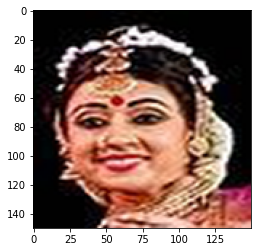

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(grayimg,cmap='gray')
#print(grayimg)

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [  1   1   1 ... 195 198 200]
 [  1   1   1 ... 203 203 203]
 [  1   1   1 ... 204 203 203]]


In [4]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2021-05-30 02:22:21--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  29.7MB/s    in 2.1s    

2021-05-30 02:22:23 (29.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



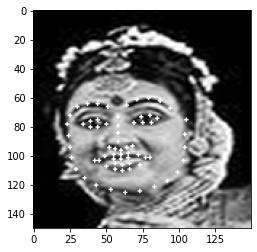

In [ ]:
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
detector=dlib.get_frontal_face_detector()                                 #face detector
face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]

for points in face:
  x1,y1=points.left(),points.top()
  x2,y2=points.right(),points.bottom()
  landmarks=predictor(grayimg,points)
  mypoints=[]
  for n in range(68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    mypoints.append([x,y])
    cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
  mypoints=np.array(mypoints)  
plt.imshow(grayimg,cmap='gray') 
#print(mypoints)  

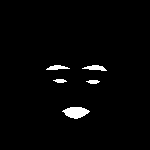

In [ ]:
mask=np.zeros_like(grayimg)
lefteye=mypoints[36:42]
lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
righteye=mypoints[42:48]
righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
lefteyebrow=mypoints[17:22]
lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
righteyebrow=mypoints[22:27]
righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
lip=mypoints[48:61]
lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
cv2_imshow(mask)
#bbox=cv2.boundingRect(pt)
#x,y,w,h=bbox
#imgcrop=grayimg[x:x+h,y:y+w]
#imgcrop=cv2.resize(imgcrop,(0,0),None,8,8)
#cv2_imshow(imgcrop)

In [ ]:
l=['veeram','bhayanakam','bheebhalsam','karunam','others']

In [ ]:
datagen=ImageDataGenerator(
					rotation_range=30,
					shear_range=0.2,
					zoom_range=0.2,
					width_shift_range=0.2,
					height_shift_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest')

In [ ]:
#detection,mask,augmentation
def preprocess():
  source_folder = '/content/drive/MyDrive/project/new_size/'
  destination_folder = '/content/drive/MyDrive/project/augmented/'
  for i in l:
    new_s=source_folder+i
    new_d=destination_folder+i+'/'
    directory=os.listdir(new_s)
    print(directory)
    for item in directory:
      img=cv2.imread(new_s+'/'+item)
      grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")   #landmark detector
      detector=dlib.get_frontal_face_detector()                                 #face detector
      face=detector(grayimg)    #rectangles[[(65, 77) (169, 181)]]
    
      for points in face:
        x1,y1=points.left(),points.top()
        x2,y2=points.right(),points.bottom()
        landmarks=predictor(grayimg,points)
        mypoints=[]
        for n in range(68):
          x=landmarks.part(n).x
          y=landmarks.part(n).y
          mypoints.append([x,y])
          #cv2.circle(grayimg,(x,y),1,(255,255,255),cv2.FILLED)
        mypoints=np.array(mypoints)  
          #plt.imshow(grayimg,cmap='gray') 
      mask=np.zeros_like(grayimg)
      lefteye=mypoints[36:42]
      lefteyemask=cv2.fillPoly(mask,[lefteye],(255,255,255))
      righteye=mypoints[42:48]
      righteyemask=cv2.fillPoly(mask,[righteye],(255,255,255))
      lefteyebrow=mypoints[17:22]
      lefteyebrowmask=cv2.fillPoly(mask,[lefteyebrow],(255,255,255))
      righteyebrow=mypoints[22:27]
      righteyebrowmask=cv2.fillPoly(mask,[righteyebrow],(255,255,255))
      lip=mypoints[48:61]
      lipmask=cv2.fillPoly(mask,[lip],(255,255,255))
      x=img_to_array(mask)
      x = x.reshape((1,) + x.shape)
      count = 0
      for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=new_d, save_prefix=item, save_format='png'):
        count=count+1
        if(count==20):
          break
     



In [ ]:
preprocess()

['1.png', '2.png', '3.png', '6.png', '9.png', '10.png', '11.png', '12.png', '14.png', '15.png', '16.png', '17.png', '18.png', '4.png', '5.png', '7.png', '8.png', '13.png', '19.png', '21.png', '22.png', '23.png', '24.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '34.png', '35.png', '36.png', '41.png', '42.png', '45.png', '46.png', '47.png', '48.png', '50.png', '51.png', '52.png']
['Copy of bhayanakam_7.png', 'Copy of bhayanakam_9.png', 'Copy of bhayanakam_5.png', '1.png', '11.png', '5.png', '9.png', '7.png', '10.png', '8.png', '14.png', '13.png', '17.png', '16.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '28.png', '29.png', '27.png', '26.png', '30.png', '31.png', '2.png', '6.png', '12.png', '15.png', '18.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png']
['Copy of 1.png', 'Copy of 3.png', 'Copy of beebhalsam_10.png', '1.png', '5.png', '3.png', '9.png', '11.png', '10.png', '8.png', '

In [42]:
#count images in a folder
source_folder = '/content/drive/MyDrive/project/augmented/'
directory = os.listdir(source_folder)
print(directory)
total=0
for i in directory:
  items=os.listdir(source_folder+i+'/')
  print("number of ",i," images: ",len(items))
  total+=len(items)
print("total number of images in dataset:",total)

['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']
number of  veeram  images:  778
number of  karunam  images:  580
number of  bhayanakam  images:  720
number of  bheebhalsam  images:  620
number of  others  images:  1966
total number of images in dataset: 4664


In [5]:
#creating list for dataframe
images=[]
labels=[]

In [6]:

#appending to list
c=0
source_folder = '/content/drive/MyDrive/project/augmented/train/'
directory = os.listdir(source_folder)
print(directory)
for i in directory:
  print(i)
  items=os.listdir(source_folder+i+'/')
  for j in items:
    images.append(cv2.imread(source_folder+i+'/'+j))
    labels.append(c)
  c=c+1  

['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']
veeram
karunam
bhayanakam
bheebhalsam
others


In [7]:
print(labels[2800])

4


In [8]:
#creating dataframe
table=df()
table['image']=images
table['class']=labels

In [ ]:
print(table)

In [9]:
X=table['image']
Y=table['class']

In [ ]:
X.shape

(5437,)

In [10]:
#to reshape and to convert to binary
x=[]
for i in X:
  x.append(i)
x=np.array(x)  
x=x/255



In [ ]:
[[[1]]] in x

True

In [ ]:
Y_train.shape


(4197, 5)

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.10,shuffle=True,random_state=1,stratify=Y)

In [24]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
X_train.shape

(4893, 150, 150, 3)

In [25]:
len(Y_test)     #number of test images, X_test is also fine

467

In [ ]:
#after model creation and compile

In [ ]:
!pip install keras_efficientnets

In [12]:
from tensorflow.keras.applications import EfficientNetB5

In [13]:
base_model=EfficientNetB5(include_top=False, weights="imagenet", input_shape=(150,150,3),classes=5)

115269632/115263384 [==============================] - 2s 0us/step


In [14]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024,activation=('relu'),input_dim=512))

model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(5,activation=('softmax'))) 

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test))

Epoch 1/30
132/132 [==============================] - 144s 569ms/step - loss: 1.9293 - accuracy: 0.3709 - val_loss: 1.7083 - val_accuracy: 0.4218
Epoch 2/30
132/132 [==============================] - 70s 534ms/step - loss: 1.2423 - accuracy: 0.4955 - val_loss: 1.6036 - val_accuracy: 0.3747
Epoch 3/30
132/132 [==============================] - 72s 542ms/step - loss: 1.1160 - accuracy: 0.5453 - val_loss: 1.3463 - val_accuracy: 0.4647
Epoch 4/30
132/132 [==============================] - 72s 544ms/step - loss: 0.9323 - accuracy: 0.6511 - val_loss: 1.5356 - val_accuracy: 0.4625
Epoch 5/30
132/132 [==============================] - 72s 549ms/step - loss: 0.7807 - accuracy: 0.7140 - val_loss: 1.7188 - val_accuracy: 0.4347
Epoch 6/30
132/132 [==============================] - 73s 552ms/step - loss: 0.6914 - accuracy: 0.7419 - val_loss: 1.7378 - val_accuracy: 0.4390
Epoch 7/30
132/132 [==============================] - 73s 551ms/step - loss: 0.6120 - accuracy: 0.7844 - val_loss: 1.5173 - val_a

In [32]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print("model, accuracy: {:5.2f}%".format(100 * acc))

15/15 - 2s - loss: 0.9212 - accuracy: 0.7131
model, accuracy: 71.31%


In [33]:
predictions=model.predict(X_test)


In [ ]:
print(predictions[1])

[6.80118194e-03 2.75307742e-04 1.90884259e-03 1.18371136e-04
 9.90896285e-01]


In [ ]:
print(Y_test[1])

[0. 0. 0. 0. 1.]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


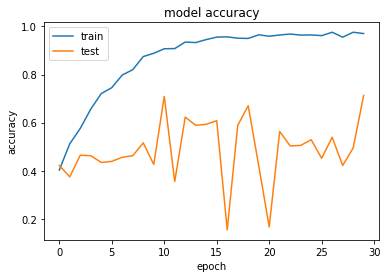

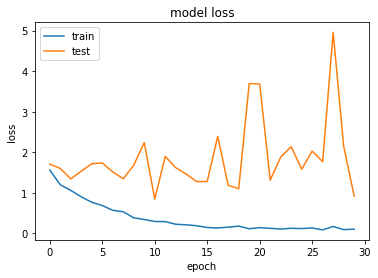

In [34]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


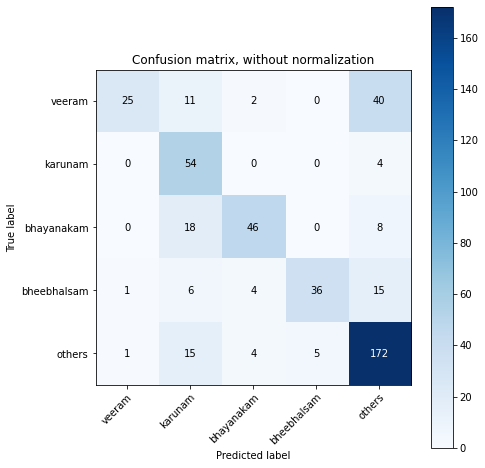

In [36]:
#Making prediction
y_pred=model.predict_classes(X_test)
y_true=np.argmax(Y_test,axis=1)

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['veeram', 'karunam', 'bhayanakam', 'bheebhalsam', 'others']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


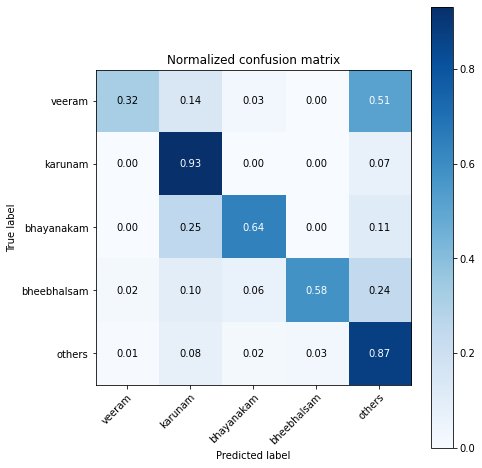

In [37]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [43]:
print(y_pred)
print(y_true)

[4 4 4 4 4 4 1 4 1 4 4 4 4 4 4 1 4 3 1 3 2 3 4 1 2 3 4 0 4 3 2 4 2 4 4 4 2
 4 4 4 1 4 4 4 4 2 4 1 4 4 2 2 4 1 4 4 1 4 0 2 4 1 4 4 0 4 4 1 4 4 4 4 2 1
 4 3 4 4 4 1 1 4 4 4 4 0 1 2 3 1 0 1 4 4 4 4 4 4 3 4 4 1 4 3 2 4 4 4 4 4 1
 1 4 4 1 1 4 4 4 4 0 4 1 4 4 4 4 1 1 1 2 4 4 0 0 4 4 4 4 4 4 4 4 3 4 2 2 0
 4 4 4 0 4 1 4 1 4 1 4 4 4 4 4 0 4 1 1 3 1 4 0 4 1 4 3 1 3 1 2 4 4 1 4 4 3
 4 1 3 4 3 0 1 4 4 1 4 4 2 2 2 4 1 4 4 4 4 3 4 1 0 1 2 2 4 4 1 3 4 4 4 4 3
 4 3 4 4 4 4 4 4 2 0 1 4 1 0 4 3 4 2 1 4 2 1 4 4 1 1 4 4 3 4 4 4 2 2 2 2 1
 4 2 4 3 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 3 4 1 4 2 3 4 1 2 4 4 4 1 1 1 1
 4 4 4 4 1 0 3 1 4 4 4 4 1 1 0 4 0 2 2 1 4 1 1 1 4 1 1 1 1 1 2 4 1 4 4 2 1
 4 1 2 1 1 4 4 2 4 1 4 4 1 2 2 1 2 3 3 4 4 4 1 3 3 4 4 3 4 1 2 4 2 0 1 2 4
 3 2 4 4 4 1 4 1 2 4 4 2 4 4 4 2 4 4 4 1 2 4 4 1 4 4 4 4 4 4 2 3 1 2 4 4 2
 2 1 0 3 4 1 4 3 4 1 0 4 1 4 4 1 4 4 1 4 3 1 4 4 1 1 0 1 4 1 4 3 4 4 1 2 1
 2 4 4 1 3 0 2 1 1 4 1 0 4 3 0 4 0 2 1 4 4 1 4]
[4 4 0 3 1 4 1 4 2 4 4 4 0 4 4 4 4 3 2 3 2 3 4 1 2 4

In [38]:
import random


In [39]:
d={0:'veeram',1:'karunam',2:'bhayanakam',3:'bheebhalsam',4:'others'}

In [40]:
for i in range(10):
  j=random.randint(0,len(Y_test)-1)  
  print(j)  #last number included
  predicted=np.argmax(predictions[j])
  actual=np.argmax(Y_test[j]) 
  print("predicted value:",d[predicted],end=", ")
  print("actual value:",d[actual])

75
predicted value: bheebhalsam, actual value: bheebhalsam
7
predicted value: others, actual value: others
108
predicted value: others, actual value: veeram
449
predicted value: veeram, actual value: veeram
123
predicted value: others, actual value: others
244
predicted value: others, actual value: others
257
predicted value: bhayanakam, actual value: bhayanakam
316
predicted value: others, actual value: others
140
predicted value: others, actual value: others
273
predicted value: bheebhalsam, actual value: others


In [44]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.7130620985010707


In [16]:
path=("/content/drive/MyDrive/project/model")

In [ ]:
model.save_weights("/content/drive/MyDrive/project/final.h5")

In [ ]:
#after running architecture
new_model=create_model()
#model.load_weights("/content/drive/MyDrive/project/final.h5")

In [ ]:
#save_model(model,path)

In [ ]:
#loaded_model=load_model(path,custom_objects=None,compile=True)